# Calculation of the Effectiveness Factor on a Spherical Particle

THis worked out example illustrates the calculation of the effectiveness factor for a spherical particle for arbitrary kinetic expressions (one reaction).

<div>
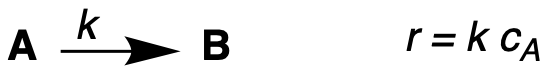
</div>


The material balance is given by:


\begin{equation}{D}_{{A}}~\nabla^{2}{c}_{{A}}~+{R}_{{A}}=0 \\ {D}_{{A}}~{\frac{1}{{r}^{2}}}~{\frac{{d}}{{d}{r}}}{\left({r}^{2}~{\frac{{d}{c}_{{A}}}{{d}{r}}} \right)}-{k}~{c}_{{A}}=0 \\ \text{ } \\ {c}_{{A}}~=~{c}_{{A}{s}}~~\begin{matrix}{~}\\
{~}
\end{matrix}{r}={R} \\ {\frac{{d}{c}_{{A}}}{{d}{r}~}}=0~\begin{matrix}{~}\\
{~}
\end{matrix}{r}=0\end{equation}

The equations can be normalized using:

\begin{equation}{a}~=~{\frac{{V}_{{p}}}{{S}_{{p}}}}={\frac{{R}}{3}} \\ \text{ } \\ \bar{r}={\frac{{r}}{{a}}}~~\begin{matrix}{~}\\
{~}
\end{matrix}\bar{c}={\frac{{c}_{{A}}}{{c}_{{A}{s}}}} \\ \text{ } \\ {\frac{1}{\bar{r}^{2}}}~{\frac{{d}}{{d}\bar{r}}}{\left(\bar{r}^{2}~{\frac{{d}\bar{c}}{{d}\bar{r}}} \right)}-\Phi^{2}~\bar{c}=0 \\ \text{ } \\ \bar{c}~=~1~~\begin{matrix}{~}\\
{~}
\end{matrix}\bar{r}=3 \\ {\frac{{d}\bar{c}}{{d}\bar{r}~}}=0~\begin{matrix}{~}\\
{~}
\end{matrix}\bar{r}=0 \\ \text{ } \\ \Phi={\sqrt{{\frac{{k}~{a}^{2}}{{D}_{{A}}}}}}\end{equation}


In the last expression, $\Phi$ is called the *Thiele Modulus*

---

We then import the libraries and functions needed.  *solve_bvp* is the function used to define the boundary value problem.

In [2]:
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

First Define the Thiele Modulus we will use for the equation

In [3]:
Thiele = 5

Rewrite the equation as a first-order system and implement its right-hand side evaluation

$y_1' = y_2$


$y_2' = Thiele^2 * rate(y_1)$

In [4]:
def fun(x, y):
    r = y[0]/(1+1 * y[0])
    return np.vstack((y[1], Thiele**2 * r ))

def bc(ya, yb):
    return np.array([ya[1], yb[0]-1])

Set up the initial conditions and solve the system of equations and boundary conditions

Note that because the differential equations have a singular term at $r = 0$, this term is added as a separate element through matrix S, such that S·y(a) = 0.  See the report "A Friendly Fortran BVP Solver", by Shampine, Muir and Xu (2006) JNAIAM.

In [5]:
x = np.linspace(0, 3, 5)     #Initial set of points
y_a = np.zeros((2, x.size))  #Guess at the initial points
S = np.array([[0.0, 0],      # This is to deal with the 2/x dy/dt term in the differential equation
              [0, -2]])

res_a = solve_bvp(fun, bc, x, y_a, S=S, verbose=2)

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          4.59e-02       0.00e+00           5              3       
       2          9.47e-03       0.00e+00           8              4       
       3          1.25e-03       0.00e+00          12              2       
       4          8.00e-04       0.00e+00          14              0       
Solved in 4 iterations, number of nodes 14. 
Maximum relative residual: 8.00e-04 
Maximum boundary residual: 0.00e+00


## Plot the results



*** Effectiveness Factor Result ***

  Thiele Modulus = 5.00
  Effectiveness Factor = 0.1423

***********************************



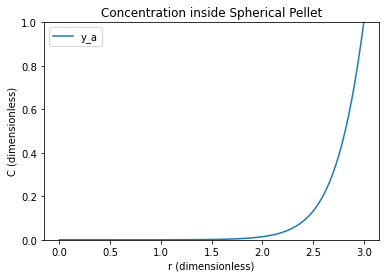

In [6]:

x_plot = np.linspace(0, 3, 100)
y_plot = res_a.sol(x_plot)[0]    #Generates values of y[0] for x_plot points

plt.plot(x_plot, y_plot, label='y_a')
plt.legend()
plt.ylim(0, 1)

plt.xlabel("r (dimensionless)")
plt.ylabel("C (dimensionless)")
plt.title("Concentration inside Spherical Pellet")

eff_fac = res_a.sol(3)[1] / Thiele**2

print("\n\n*** Effectiveness Factor Result ***\n")
print(f"  Thiele Modulus = {Thiele:3.2f}")
print(f"  Effectiveness Factor = {eff_fac:5.4f}")
print("\n***********************************\n")